In [2]:
# import iris module
# import iris module
import iris
import netCDF4 as nc
import numpy as np
import iris.coords as coords
import cf_units
import iris.cube as icube
import pdb
from scipy.stats import kurtosis
from scipy import stats
import seaborn as sns
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import math
import numpy.ma as ma
import datetime as dt
import iris.plot as iplt
import matplotlib as mpl
from scipy.stats import chi2
import pandas as pd
import iris
from scipy.stats import gaussian_kde
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.spatial.distance import mahalanobis, pdist, squareform
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm
# import functions
from FidelityTest import calcDistrStatistic, timeseries_fid_test, plot_fidelity_testing, get_cube_limits, plotStatsMeasures,fidelity_testing_compare
from BiasCorrection import mean_bias_correction, kurtosis_power_transform, ratio_correction,Quantile_mapping,ks_compare_distributions,mean_correction, calculate_return_periods,plot_return_periods

In [3]:
import iris
print(iris.__version__)



3.9.0


In [4]:
# Define paths for source data
DATA_PATH = '/Users/evayang/Desktop/Downloaded_data_folder/'  
FILE = 'yangtze_summer_{}_{}.nc'

# FILE completes with variable (either 'tas' or 'pr') 
# and one of the following:
# obs_ERA5-Land
# model_DePreSys3
# model_DePreSys4

In [5]:
# load data
var = 'pr'
obs_cube = iris.load_cube(DATA_PATH + FILE.format(var, 'obs_ERA5-Land'))
mod3_cube = iris.load_cube(DATA_PATH + FILE.format(var, 'model_DePreSys3'))
mod4_cube = iris.load_cube(DATA_PATH + FILE.format(var, 'model_DePreSys4'))

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/__init__.py:354: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  cubes = _load_collection(uris, constraints, callback).cubes()


In [6]:
# Print coord information
print('OBS')
print(obs_cube.coord('latitude'))
print()
print('DEPRESYS3')
print(mod3_cube.coord('latitude'))
print()
print('DEPRESYS4')
print(mod4_cube.coord('latitude'))

print('OBS')
print(obs_cube.coord('longitude'))
print()
print('DEPRESYS3')
print(mod3_cube.coord('longitude'))
print()
print('DEPRESYS4')
print(mod4_cube.coord('longitude'))

OBS
DimCoord :  latitude / (degrees)
    points: [15.277786, 15.833336, ..., 54.16668 , 54.722237]
    bounds: [
        [15.000011, 15.555561],
        [15.555561, 16.111115],
        ...,
        [53.8889  , 54.444458],
        [54.444458, 55.000015]]
    shape: (72,)  bounds(72, 2)
    dtype: float32
    standard_name: 'latitude'
    var_name: 'latitude'
    coord_system: GeogCS(6371229.0)

DEPRESYS3
DimCoord :  latitude / (degrees)
    points: [15.277786, 15.833336, ..., 54.16668 , 54.722237]
    bounds: [
        [15.000011, 15.555561],
        [15.555561, 16.111115],
        ...,
        [53.8889  , 54.444458],
        [54.444458, 55.000015]]
    shape: (72,)  bounds(72, 2)
    dtype: float32
    standard_name: 'latitude'
    var_name: 'latitude'
    coord_system: GeogCS(6371229.0)

DEPRESYS4
DimCoord :  latitude / (degrees)
    points: [14.722229  , 15.27778625, ..., 54.16667938, 54.72223663]
    bounds: [
        [14.44445038, 15.00000763],
        [15.00000763, 15.55556107],
 

In [7]:
# Print cube summaries
print(mod3_cube)
print(mod4_cube)
print(obs_cube)

unknown / (mm)                      (DePreSys start date: 2; time: 30; realization: 40; latitude: 72; longitude: 84)
    Dimension coordinates:
        DePreSys start date                             x        -                -             -              -
        time                                            -        x                -             -              -
        realization                                     -        -                x             -              -
        latitude                                        -        -                -             x              -
        longitude                                       -        -                -             -              x
    Auxiliary coordinates:
        month                                           -        x                -             -              -
        month_number                                    -        x                -             -              -
        season_year                   

In [8]:
# DEPRESYS4 data
# includes an extra longitude at the end
# includes an extra latitude at the beginning

# to remove these need to ask for..
# data[:, :, :, 1:, :-1]
# 1st coord is leadtime, 2nd is time, 3rd realization, 4th latitude, 5th longitude

In [9]:
# Select required data and check
fixed_mod4_cube = mod4_cube[:, :, :, 1:, :-1]
print(fixed_mod4_cube)
print()
print('Fixed DEPRESYS4')
print(fixed_mod4_cube.coord('latitude'))
print(fixed_mod4_cube.coord('longitude'))
print()
print('OBS')
print(obs_cube.coord('latitude'))
print(obs_cube.coord('longitude'))

unknown / (mm)                      (leadtime: 10; year: 30; realisation: 10; latitude: 72; longitude: 84)
    Dimension coordinates:
        leadtime                             x         -                -             -              -
        year                                 -         x                -             -              -
        realisation                          -         -                x             -              -
        latitude                             -         -                -             x              -
        longitude                            -         -                -             -              x
    Scalar coordinates:
        month_number                7.0, bound=(6, 8)
    Cell methods:
        0                           year: sum
    Attributes:
        Conventions                 'CF-1.7'
        activity_id                 'DCPP'
        branch_method               'no parent'
        branch_time_in_child        0.0
        branch_ti

In [10]:
# save cube
iris.save(fixed_mod4_cube, FILE.format(var, 'model_DePreSys4'))

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/fileformats/netcdf/saver.py:2670: IrisDeprecation: Saving to netcdf with legacy-style attribute handling for backwards compatibility.
This mode is deprecated since Iris 3.8, and will eventually be removed.
Please consider enabling the new split-attributes handling mode, by setting 'iris.FUTURE.save_split_attrs = True'.
  warn_deprecated(message)


/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


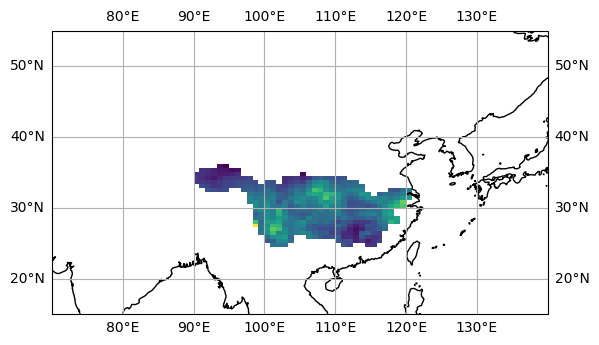

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# plotting - setup cartopy axes
# e.g. https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# plot netcdf data easily using either iris plot or quickplot module
# see https://scitools-iris.readthedocs.io/en/stable/userguide/plotting_a_cube.html#iris-cube-plotting
# also https://scitools-iris.readthedocs.io/en/stable/userguide/plotting_a_cube.html#plotting-2-dimensional-cubes
iplt.pcolormesh(obs_cube[29])

In [12]:
## data:
## obs_cube, mod3_cube, mod4_cube

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month_number'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'year', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'year'. Ignoring bounds.
  warnings.warn(
/Users/evayang/ana

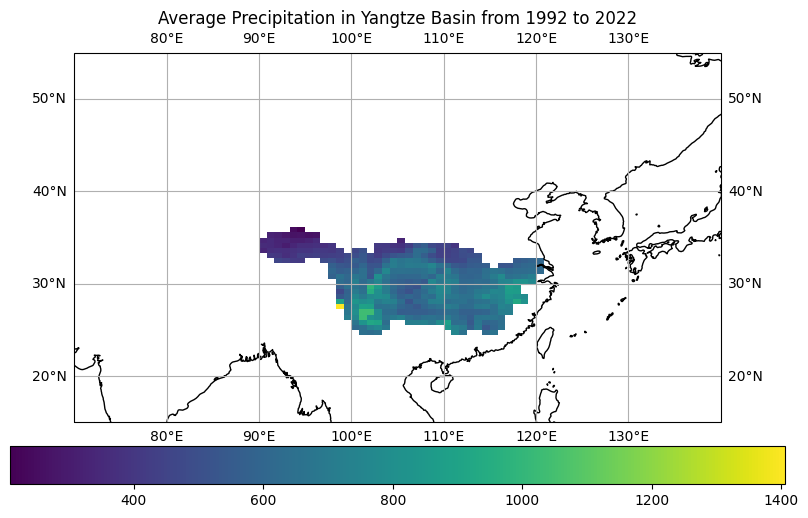

In [13]:
# mean obs visualisation
mean_cube = obs_cube.collapsed('time', iris.analysis.MEAN)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
c = iplt.pcolormesh(mean_cube, axes=ax)
plt.colorbar(c, orientation='horizontal', pad=0.05)
plt.title('Average Precipitation in Yangtze Basin from 1992 to 2022')
plt.show()

In [14]:
mod4_cube = fixed_mod4_cube
mod4_cube.shape

(10, 30, 10, 72, 84)

In [15]:
def reshape_cube(cube):
    if cube.shape != (2, 30, 40, 72, 84):
        raise ValueError("input shape (2, 30, 40, 72, 84)")

    data = cube.data
    data_reordered = np.transpose(data, (1, 0, 2, 3, 4))
    new_data = data_reordered.reshape(30, 80, 72, 84)
    new_cube = iris.cube.Cube(new_data)
    new_cube.metadata = cube.metadata
    dim_coords = [coord for coord in cube.dim_coords]
    if len(dim_coords) > 1:
        new_cube.add_dim_coord(dim_coords[1], 0)
    new_coord = iris.coords.DimCoord(np.arange(80), long_name='realizations')
    new_cube.add_dim_coord(new_coord, 1)
    if len(dim_coords) > 3:
        new_cube.add_dim_coord(dim_coords[3], 2)
    if len(dim_coords) > 4:
        new_cube.add_dim_coord(dim_coords[4], 3)
    for coord in cube.aux_coords:
        if coord.shape == ():
            new_cube.add_aux_coord(coord)
        elif coord.shape == (30,):
            new_cube.add_aux_coord(coord, 0)
        elif coord.shape in [(72,), (84,)]:
            new_cube.add_aux_coord(coord, 2 if coord.shape == (72,) else 3)
    return new_cube

mod3_cube_shape = reshape_cube(mod3_cube)
mod3_cube_shape

Unknown (mm),time,realizations,latitude,longitude
Shape,30,80,72,84
Dimension coordinates,,,,
time,x,-,-,-
realizations,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
month,x,-,-,-
month_number,x,-,-,-
season_year,x,-,-,-


In [16]:
def reshape_cube(cube):
    if cube.shape != (10, 30, 10, 72, 84):
        raise ValueError("input shape (2, 30, 10, 72, 84)")

    data = cube.data
    data_reordered = np.transpose(data, (1, 0, 2, 3, 4))
    new_data = data_reordered.reshape(30, 100, 72, 84)
    new_cube = iris.cube.Cube(new_data)
    new_cube.metadata = cube.metadata
    dim_coords = [coord for coord in cube.dim_coords]
    if len(dim_coords) > 1:
        new_cube.add_dim_coord(dim_coords[1], 0)
    new_coord = iris.coords.DimCoord(np.arange(100), long_name='realizations')
    new_cube.add_dim_coord(new_coord, 1)
    if len(dim_coords) > 3:
        new_cube.add_dim_coord(dim_coords[3], 2)
    if len(dim_coords) > 4:
        new_cube.add_dim_coord(dim_coords[4], 3)
    for coord in cube.aux_coords:
        if coord.shape == ():
            new_cube.add_aux_coord(coord)
        elif coord.shape == (30,):
            new_cube.add_aux_coord(coord, 0)
        elif coord.shape in [(72,), (84,)]:
            new_cube.add_aux_coord(coord, 2 if coord.shape == (72,) else 3)
    return new_cube

mod4_cube_shape = reshape_cube(mod4_cube)
mod4_cube_shape

<iris 'Cube' of unknown / (mm) (year: 30; realizations: 100; latitude: 72; longitude: 84)>

## plot

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'realizations', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'realizations'. Ignoring bounds.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month_number'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(
/U

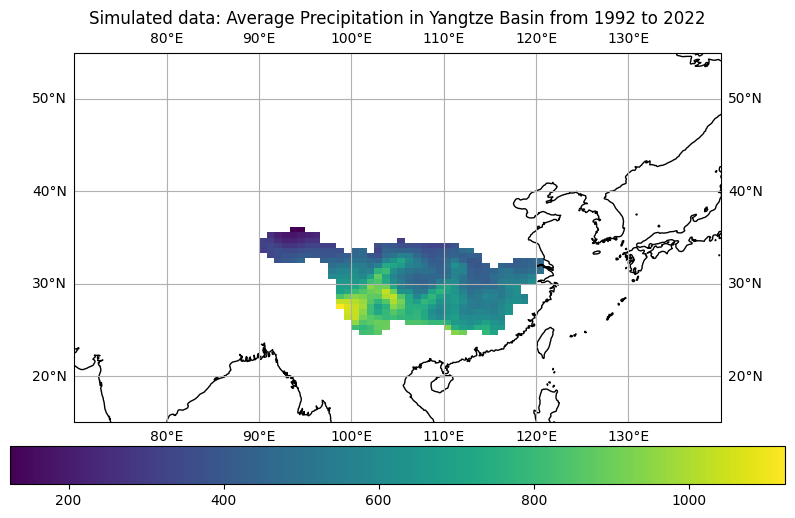

In [17]:
mean_cube = mod3_cube_shape.collapsed(['time', 'realizations'], iris.analysis.MEAN)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
c = iplt.pcolormesh(mean_cube, axes=ax)
plt.colorbar(c, orientation='horizontal', pad=0.05)
plt.title('Simulated data: Average Precipitation in Yangtze Basin from 1992 to 2022')
plt.show()

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'realizations', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'realizations'. Ignoring bounds.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month_number'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'season_year'.
  warnings.warn(
/U

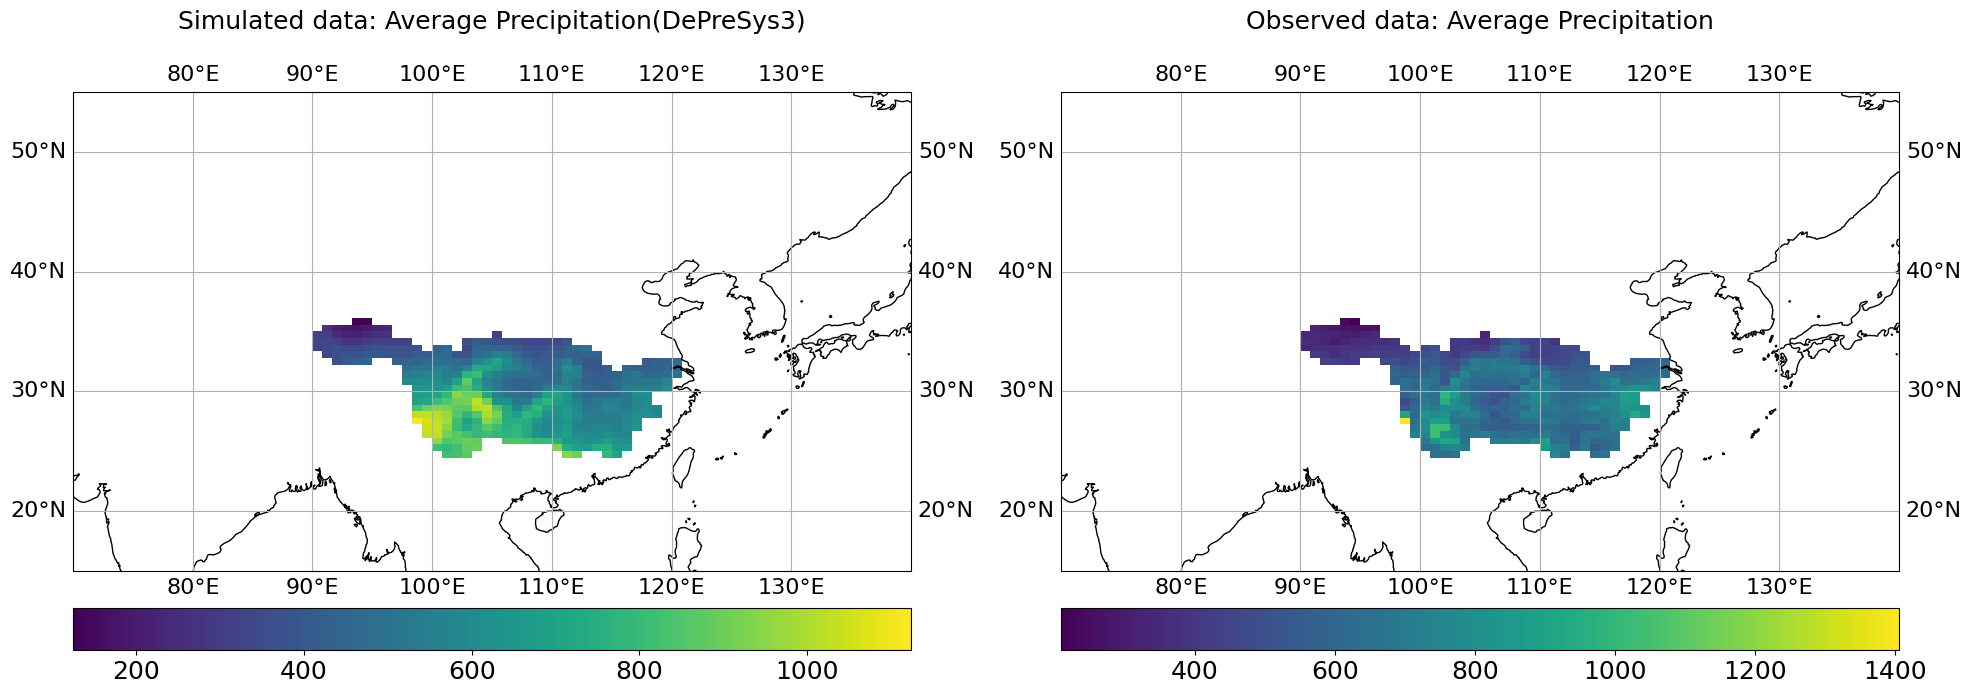

In [18]:
mean_cube_mod = mod3_cube_shape.collapsed(['time', 'realizations'], iris.analysis.MEAN)
mean_cube_obs = obs_cube.collapsed('time', iris.analysis.MEAN)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size': 16}) 
def plot_subplot(ax, data, title):
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    c = iplt.pcolormesh(data, axes=ax)
    cbar = plt.colorbar(c, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(title)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title(title, fontsize=18)
    ax.tick_params(labelsize=18)
    
plot_subplot(ax1, mean_cube_mod, 'Simulated data: Average Precipitation(DePreSys3)\n')
plot_subplot(ax2, mean_cube_obs, 'Observed data: Average Precipitation\n')
plt.tight_layout()
plt.show()

/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'year', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'year'. Ignoring bounds.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'realizations', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'realizations'. Ignoring bounds.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetadataWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(
/Users/evayang/anaconda3/lib/python3.11/site-packages/iris/coords.py:2164: IrisVagueMetada

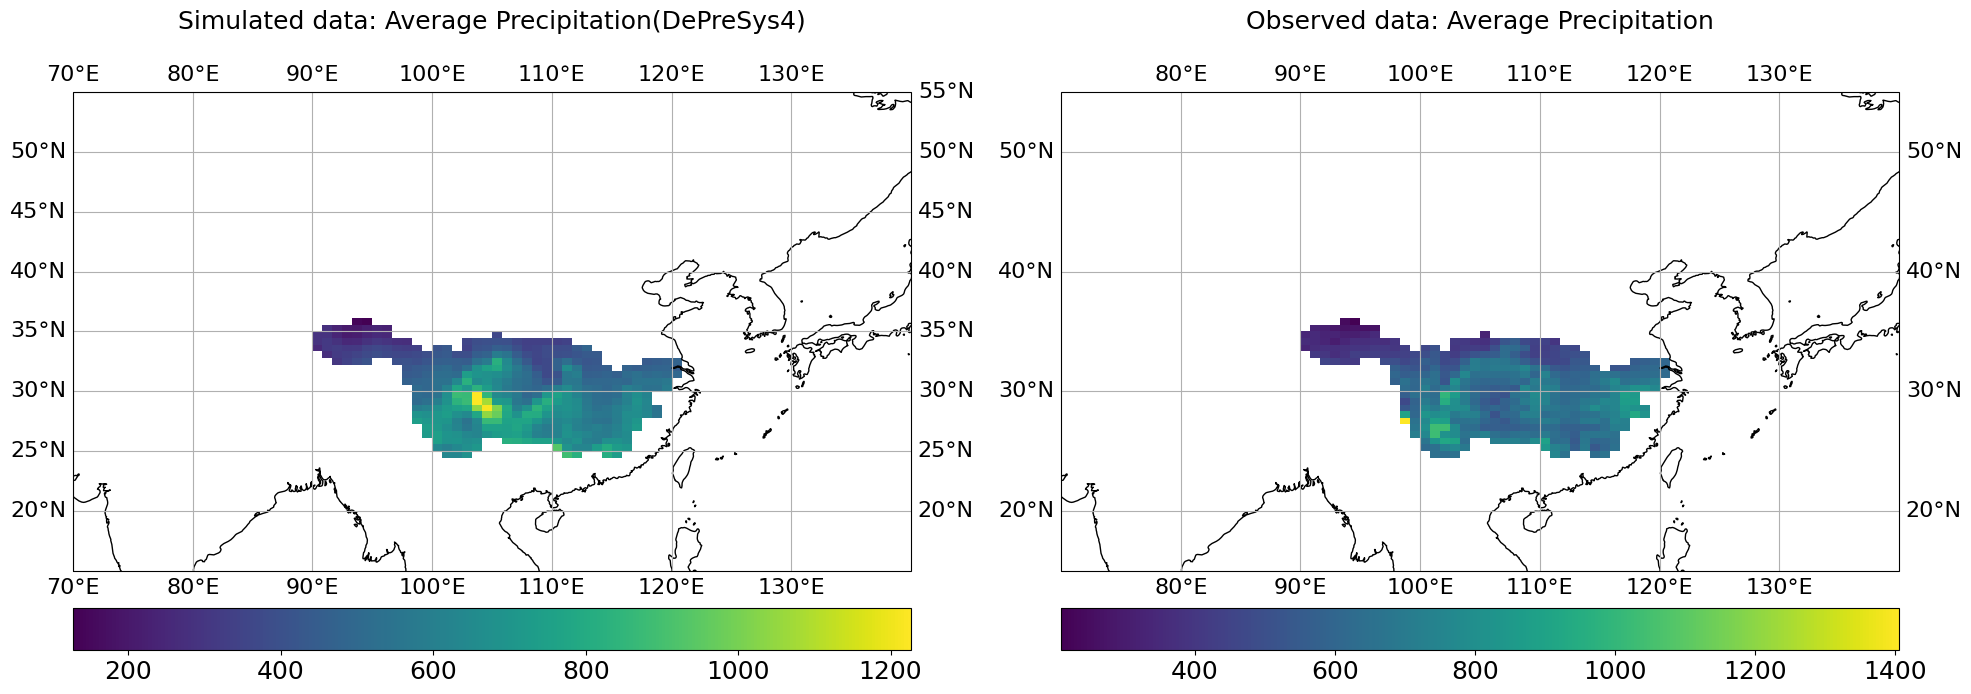

In [19]:
mean_cube_mod = mod4_cube_shape.collapsed(['year', 'realizations'], iris.analysis.MEAN)
mean_cube_obs = obs_cube.collapsed('time', iris.analysis.MEAN)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size': 16}) 
def plot_subplot(ax, data, title):
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    c = iplt.pcolormesh(data, axes=ax)
    cbar = plt.colorbar(c, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(title)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title(title, fontsize=18)
    ax.tick_params(labelsize=18)
    
plot_subplot(ax1, mean_cube_mod, 'Simulated data: Average Precipitation(DePreSys4)\n')
plot_subplot(ax2, mean_cube_obs, 'Observed data: Average Precipitation\n')
plt.tight_layout()
plt.show()

# Fidelity Test: 

## Using four stastical features: mean/std/skewness/kurtosis

In [20]:
def mask_inconsistent_grids(mod, is_consistent):
    assert mod.shape[2:] == is_consistent.shape, "inconsistent shape"
    masked_mod = ma.array(mod.copy())
    for i in range(72):
        for j in range(84):
            if not is_consistent[i, j]:
                masked_mod[:, :, i, j] = ma.masked    
    return masked_mod

import numpy as np
import numpy.ma as ma

def check_measure_consistency(mod, obs):
    mod_means = ma.mean(mod, axis=(0, 1)) 
    obs_mean = ma.mean(obs, axis=0)
    is_consistent = ma.masked_all((72, 84), dtype=bool)
    
    total_grids = 72 * 84
    consistent_count = 0
    masked_count = 0
    
    for i in range(72):
        for j in range(84):
            if ma.is_masked(obs_mean[i, j]) or ma.getmask(mod_means[i, j]):
                masked_count += 1
            else:
                stats_measures = timeseries_fid_test(obs.data[:, i, j], mod.data[:, :, i, j])
                is_consistent[i, j] = (2.5 <= stats_measures[2] <= 97.5 and 
                                       2.5 <= stats_measures[3] <= 97.5 and 
                                       2.5 <= stats_measures[4] <= 97.5 and
                                       2.5 <= stats_measures[5] <= 97.5)
                if is_consistent[i, j]:
                    consistent_count += 1

    new_mod = mask_inconsistent_grids(mod, is_consistent)
    
    # 计算比例
    consistency_ratio = consistent_count / total_grids
    masked_ratio = masked_count / total_grids
    valid_ratio = (total_grids - masked_count) / total_grids
    
    print(f"Consistency ratio (including masked grids): {consistency_ratio:.2%}")
    print(f"Masked grids ratio: {masked_ratio:.2%}")
    print(f"Valid grids ratio: {valid_ratio:.2%}")
    print(f"Consistency ratio among valid grids: {(consistent_count / (total_grids - masked_count)):.2%}")

    return is_consistent, new_mod, consistency_ratio

In [21]:
def check_measure_consistency_ks(mod, obs):
    is_consistent = ma.masked_all((72, 84), dtype=bool)    
    for i in range(72):
        for j in range(84):
            obs_data = obs[:, i, j]
            mod_data = mod[:, :, i, j]
            obs_valid = ma.compressed(ma.masked_invalid(obs_data))
            
            if len(obs_valid) > 0:
                p_values = []
                for ensemble in range(mod.shape[1]):
                    ensemble_data = mod_data[:, ensemble]
                    ensemble_valid = ma.compressed(ma.masked_invalid(ensemble_data))                   
                    if len(ensemble_valid) > 0:
                        if len(obs_valid) > 0 and len(ensemble_valid) > 0:
                            #ks test
                            _, p_value = stats.ks_2samp(obs_valid, ensemble_valid)
                            p_values.append(p_value)                
                if p_values:  
                    is_consistent[i, j] = np.mean(np.array(p_values) > 0.05) >= 0.90
    
    new_mod = mask_inconsistent_grids(mod, is_consistent)    
    return is_consistent, new_mod


In [22]:
def bias_correction_grid(mod_cube, obs_cube):
    mod_data = mod_cube.data
    obs_data = obs_cube.data
    mod_mean = np.mean(mod_data, axis=(0, 1))
    mod_std = np.std(mod_data, axis=(0, 1))
    obs_mean = np.mean(obs_data, axis=0)
    obs_std = np.std(obs_data, axis=0)
    epsilon = 1e-8
    mod_std = np.maximum(mod_std, epsilon)
    mod_corrected = np.zeros_like(mod_data)
    for i in range(mod_data.shape[0]):
        for j in range(mod_data.shape[1]):
            #correction
            mod_corrected[i, j] = ((mod_data[i, j] - mod_mean) / mod_std * obs_std) + obs_mean
    corrected_mod = mod_cube.copy()
    corrected_mod.data = mod_corrected
    corrected_mod.rename('Bias_Corrected_' + mod_cube.name())
    corrected_mod.attributes['bias_correction'] = 'Applied'
    return corrected_mod     

In [23]:
def plot_consistency_double(consistency_map1, consistency_map2, lons, lats, 
                            title1='Fidelity Test for Original data', 
                            title2='Fidelity Test for Corrected data'):
                          #  main_title='Comparison of corrected and original simulations'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9), 
                                   subplot_kw={'projection': ccrs.PlateCarree()})
    plt.rcParams.update({'font.size': 14})
    
    cmap = plt.cm.colors.ListedColormap(['red', 'green'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    def plot_single(ax, data, title):
        im = ax.pcolormesh(lons, lats, data, cmap=cmap, norm=norm, 
                           transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.gridlines(draw_labels=True)
        ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
        ax.set_title(title, fontsize=16)
        return im
    
    plot_single(ax1, consistency_map1, title1)
    plot_single(ax2, consistency_map2, title2)
    
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', edgecolor='black', label='Consistent'),
                       Patch(facecolor='red', edgecolor='black', label='Inconsistent')]
    for ax in [ax1, ax2]:
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1),
                  bbox_transform=ax.transAxes, fontsize=12)
    
    #plt.suptitle(main_title, fontsize=18)
    plt.tight_layout()
    plt.show()


In [24]:
def plot_consistency_double(consistency_map1, consistency_map2, lons, lats, 
                            title1='Fidelity Test for Original data', 
                            title2='Fidelity Test for Corrected data'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 25), 
                                   subplot_kw={'projection': ccrs.PlateCarree()})
    plt.rcParams.update({'font.size': 14})
    
    cmap = plt.cm.RdYlGn  # Red-Yellow-Green colormap
    bounds = [0, 0.25, 0.5, 0.75, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    def plot_single(ax, data, title):
        im = ax.pcolormesh(lons, lats, data, cmap=cmap, norm=norm, 
                           transform=ccrs.PlateCarree())
        provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
        ax.add_feature(provinces, edgecolor='gray', linewidth=0.5)
        ax.coastlines(resolution='50m', color='black', linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        cities = {
            'SH': (121.4737, 31.2304),
            'GZ': (113.2644, 23.1291),
            'CQ': (106.5504, 29.5633),
            'WH': (114.3055, 30.5928),
            'CS': (112.9834, 28.1834),
        }
        for city, coords in cities.items():
            ax.plot(coords[0], coords[1], 'ko', markersize=5, transform=ccrs.PlateCarree())
            ax.text(coords[0], coords[1], city, fontsize=10, ha='right', va='bottom', transform=ccrs.PlateCarree())
        
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
        ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
        ax.set_title(title, fontsize=12, pad=20)
        return im
    
    im1 = plot_single(ax1, consistency_map1, title1)
    im2 = plot_single(ax2, consistency_map2, title2)
    
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', edgecolor='black', label='Consistent'),
                       Patch(facecolor='red', edgecolor='black', label='Inconsistent')]
    for ax in [ax1, ax2]:
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1),
                  bbox_transform=ax.transAxes, fontsize=12)
    #fig.suptitle('Comparison of Original and Corrected Data Consistency', fontsize=22, y=1.05)
    
    plt.tight_layout()
    plt.show()



In [25]:
lons =mod3_cube_shape.coord('longitude').points
lats =mod3_cube_shape.coord('latitude').points

# DePreSys3 data
## Fidelity Test

In [28]:
# original data 
consistency_map3,new_mod3,consistency_ratio3 = check_measure_consistency(mod3_cube_shape.data, obs_cube.data)

Consistency ratio (including masked grids): 1.52%
Masked grids ratio: 92.86%
Valid grids ratio: 7.14%
Consistency ratio among valid grids: 21.30%


In [29]:
# bias corrected
mod_corrected = bias_correction_grid(mod3_cube_shape, obs_cube)  

In [30]:
# corrected data: test mean,variance,skewness,kurtosis
consistency_map_cor3,new_mod_cor3,consistency_ratio3_cor = check_measure_consistency(mod_corrected.data, obs_cube.data)

Consistency ratio (including masked grids): 6.18%
Masked grids ratio: 92.86%
Valid grids ratio: 7.14%
Consistency ratio among valid grids: 86.57%


/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


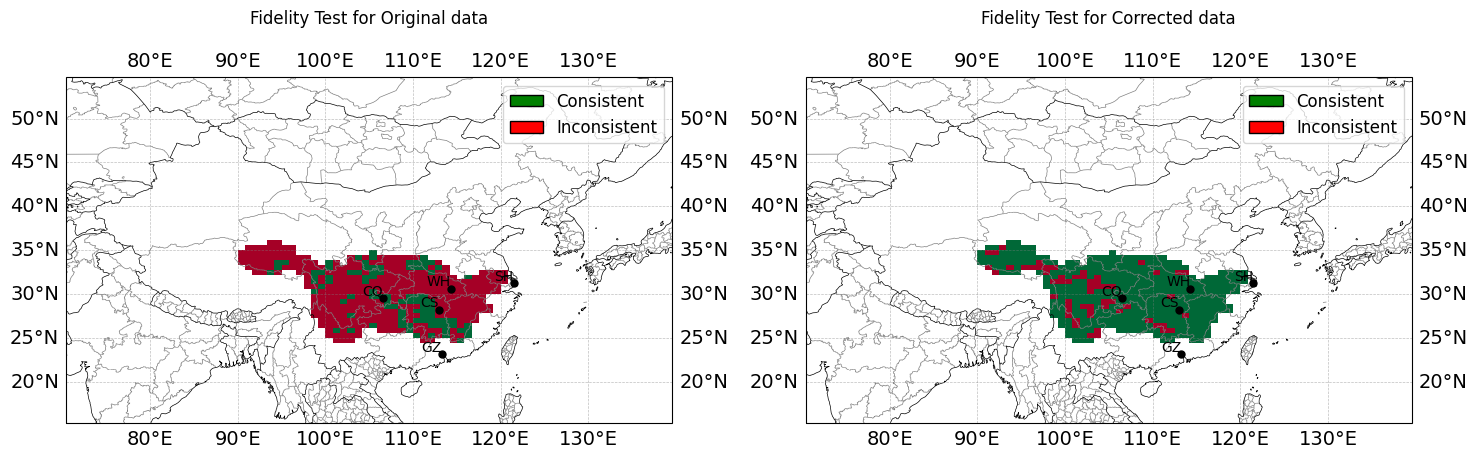

In [31]:
plot_consistency_double(consistency_map3, consistency_map_cor3, lons, lats)

# likelihood of extreme events

In [68]:
def mod_extreme_high(new_mod, obs):
    obs_max = ma.max(obs)
    obs_min = ma.min(obs)
    mod_max = ma.max(new_mod, axis=(0, 1))  # shape: (72, 84)
    mod_min = ma.min(new_mod, axis=(0, 1))  # shape: (72, 84)
    comparison = ma.masked_all((72, 84), dtype=int)
    for i in range(72):
        for j in range(84):
            if ma.getmask(new_mod[:, :, i, j]).all():  
                comparison[i, j] = 0  # Masked
            else:
                if mod_max[i, j] > obs_max * 1.2:
                    comparison[i, j] = 1  # > Obs Max * 1.2
                elif mod_max[i, j] > obs_max * 1.1:
                    comparison[i, j] = 2  # > Obs Max * 1.1
                elif mod_max[i, j] > obs_max:
                    comparison[i, j] = 3  # > Obs Max
                elif mod_max[i, j] > obs_max * 0.9:
                    comparison[i, j] = 4  # > Obs Max * 0.9
                elif mod_max[i, j] > obs_max * 0.8:
                    comparison[i, j] = 5  # > Obs Max * 0.8
                else:
                    comparison[i, j] = 6  # Within Obs Range
    return comparison

def mod_extreme_low(new_mod, obs):
    obs_min = ma.min(obs)
    mod_min = ma.min(new_mod, axis=(0, 1))  # shape: (72, 84)
    comparison = ma.masked_all((72, 84), dtype=int)
    for i in range(72):
        for j in range(84):
            if ma.getmask(new_mod[:, :, i, j]).all():  
                comparison[i, j] = 0  # Masked
            else:
                if mod_min[i, j] < obs_min * 0.8:
                    comparison[i, j] = 1  # < Obs Max * 1.2
                elif mod_min[i, j] < obs_min * 0.9:
                    comparison[i, j] = 2  # < Obs Max * 1.1
                elif mod_min[i, j] < obs_min:
                    comparison[i, j] = 3  # < Obs Max
                elif mod_min[i, j] < obs_min * 1.1:
                    comparison[i, j] = 4  # < Obs Max * 0.9
                elif mod_min[i, j] < obs_min * 1.2:
                    comparison[i, j] = 5  # < Obs Max * 0.8
                else:
                    comparison[i, j] = 6  # Within Obs Range
    return comparison

In [69]:
def plot_likelihood_simulation_high(comparison, lons, lats):
    fig, ax = plt.subplots(figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    plt.rcParams.update({'font.size': 16})
    colors_high = ['#FFFFFF', '#8B0000', '#FF0000', '#FF4500', '#FFA500', '#FFFF00', '#2E8B57']
    cmap = ListedColormap(colors_high)
    bounds = np.arange(8) - 0.5  
    norm = BoundaryNorm(bounds, cmap.N)
    im = ax.pcolormesh(lons, lats, comparison, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}  
    gl.ylabel_style = {'size': 14} 
    
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.03, aspect=30)
    cbar.set_ticks(np.arange(7))
    cbar.ax.set_yticklabels([
        'No Data',
        '>120% Max',
        '110-120% Max',
        '100-110% Max',
        '90-100% Max',
        '80-90% Max',
        'Normal'
    ], fontsize=14)
    cbar.set_label('High Precipitation Anomalies', fontsize=14, labelpad=15)
    plt.tight_layout(pad=2.0)
    plt.show()


In [70]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_likelihood_simulation_low(comparison, lons, lats):
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    colors_low = ['#FFFFFF', '#00008B', '#0000FF', '#1E90FF', '#87CEFA', '#ADD8E6', '#2E8B57']
    cmap = ListedColormap(colors_low)
    bounds = np.arange(8) - 0.5
    norm = BoundaryNorm(bounds, cmap.N)
    
    im = ax.pcolormesh(lons, lats, comparison, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 14}  
    gl.ylabel_style = {'size': 14} 
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
    
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.03, aspect=30)
    cbar.set_ticks(np.arange(7))
    cbar.ax.set_yticklabels([
        'Masked',
        '<80% Min',
        '80-90% Min',
        '90-100% Min',
        '100-110% Min',
        '110-120% Min',
        'Normal'
    ], fontsize=14)
    cbar.set_label('Low Precipitation Anomalies', fontsize=14, labelpad=15)
    plt.tight_layout(pad=2.0)
    plt.show()


/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


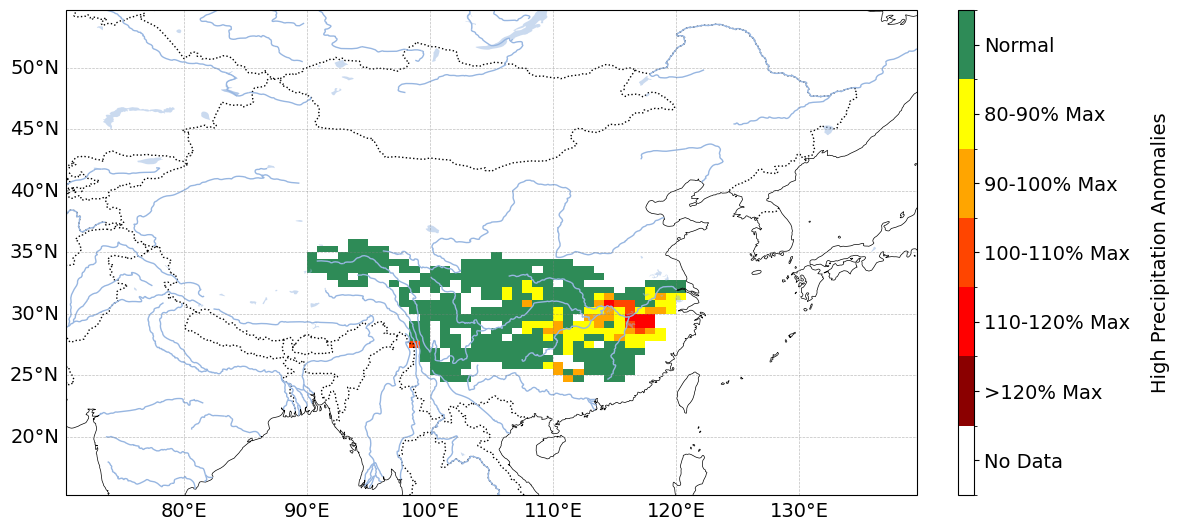

/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


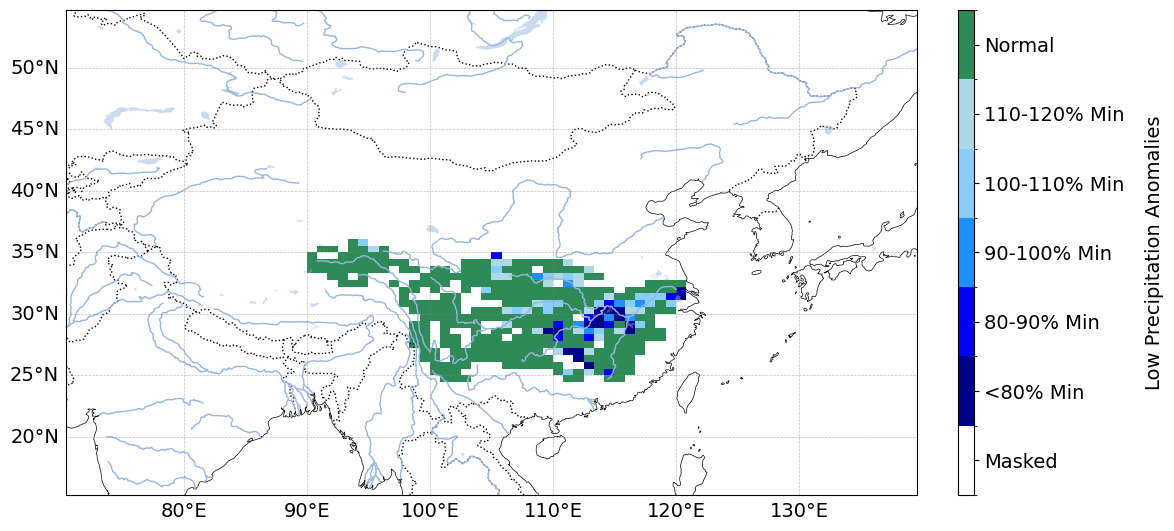

In [72]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
comparison_high = mod_extreme_high(new_mod_cor3, obs_cube.data)

plot_likelihood_simulation_high(comparison_high,lons, lats)
comparison_low = mod_extreme_low(new_mod_cor3, obs_cube.data)

plot_likelihood_simulation_low(comparison_low,lons, lats)

# DePreSys4 data
## Fidelity Test

In [36]:
consistency_map4,new_mod4,consistency_ratio4 = check_measure_consistency(mod4_cube_shape.data, obs_cube.data)

Consistency ratio (including masked grids): 1.60%
Masked grids ratio: 92.86%
Valid grids ratio: 7.14%
Consistency ratio among valid grids: 22.45%


## Bias Correction 

In [37]:
mod4_corrected = bias_correction_grid(mod4_cube_shape, obs_cube)           

In [38]:
consistency_map_cor4, new_mod_cor4,consistency_ratio4_cor = check_measure_consistency(mod4_corrected.data, obs_cube.data)

Consistency ratio (including masked grids): 6.15%
Masked grids ratio: 92.86%
Valid grids ratio: 7.14%
Consistency ratio among valid grids: 86.11%


/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


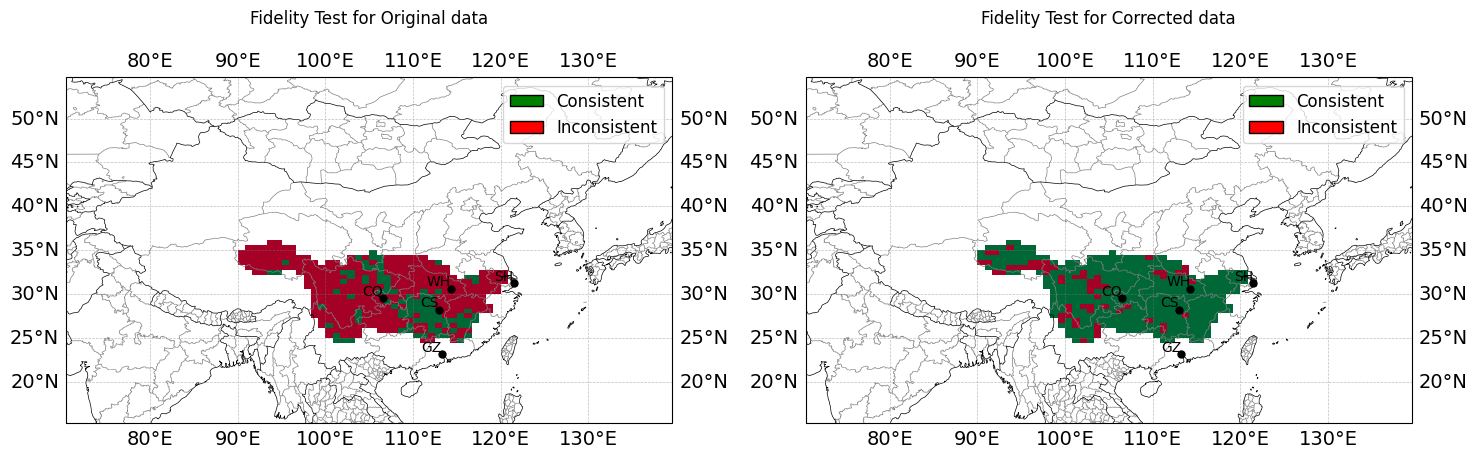

In [39]:
plot_consistency_double(consistency_map4, consistency_map_cor4, lons, lats)

/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


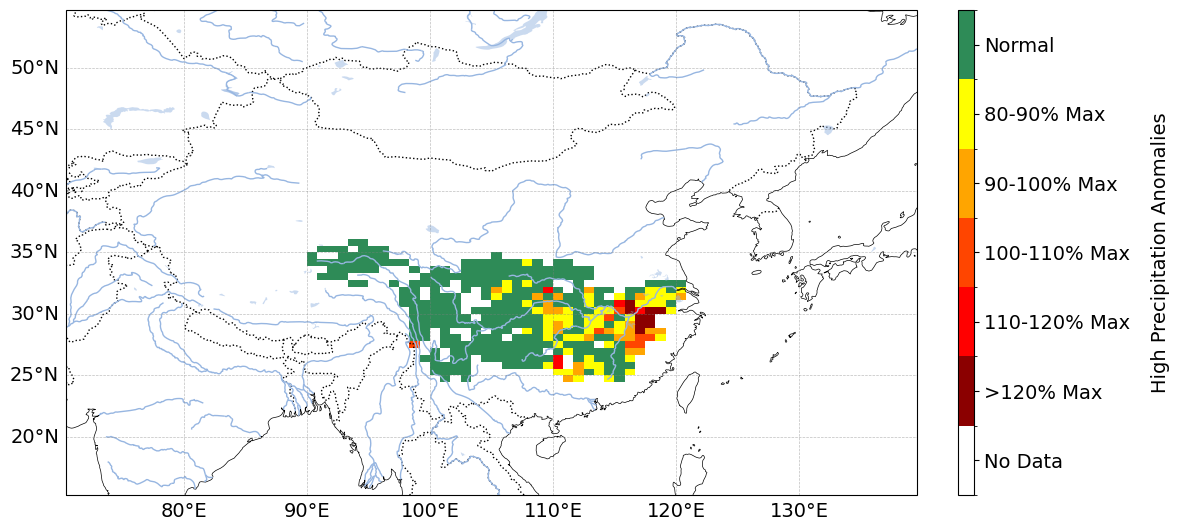

/Users/evayang/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


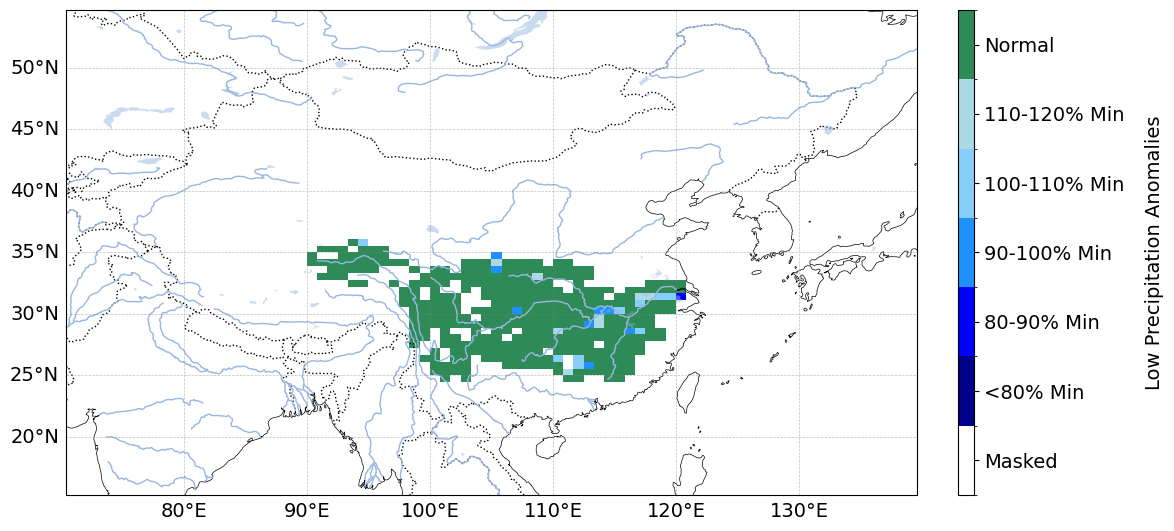

In [40]:
comparison_high4 = mod_extreme_high(new_mod_cor4, obs_cube.data)
plot_likelihood_simulation_high(comparison_high4,lons, lats)
comparison_low4 = mod_extreme_low(new_mod_cor4, obs_cube.data)
plot_likelihood_simulation_low(comparison_low4,lons, lats)

In [27]:
def calcPercentile(obs, model): # returning the location percentage of obs/model
    '''
    Parameters
    ----------
    obs:        observed values;    list/array
    model:      modelled values;    list/array

    Returns
    -------
    percentile: where obs lie in model range
     '''
    model = sorted(model)
    ind = min(range(len(model)), key=lambda i: abs(model[i]-obs))
    percentile = ind/float(len(model))*100
    return percentile

def calcDistrStatistic(obs, model, statistics, n_samples):
    '''
    Parameters
    ----------
    obs:        observed values;    numpy array, dimension (nyrs[, nmonths])
    model:      modelled values;    numpy array, dimension (nyrs, n ensemble members[, nmonths])
    n_samples:  number of samples;  integer
    statistics: statistics to calculate (mean, std, skew, kurt, linear_trend); tuple of strings

    Returns
    -------
    obs_stat:   Observed distribution mean
    model_stat: n_samples model distribution statistic

    Note: Sampling retains the time series
    '''
    nyrs = obs.shape[0]
    # test if there are multiple months being tested, i.e. lumped together
    # if so, determine number of months, flatten obs,
    # reshape the model array to be [nyrs, ensemble members x nmonths]
    if obs.ndim != 1:
        nmonths = obs.shape[1]
        obs = obs.ravel()
        model = model.reshape(model.shape[0], model.shape[1]*model.shape[2])
    else:
        nmonths = 1
        # Added next line for testing
        model = model.reshape(model.shape[1], model.shape[0])


    obs_stats_dict = {}

    # calculate obs distribution statistic
    if 'mean' in statistics:
        obs_stats_dict['mean'] = np.mean(obs)
    if 'std' in statistics:
        obs_stats_dict['std'] = np.std(obs)
    if 'skew' in statistics:
        obs_stats_dict['skew'] = stats.skew(obs)
    if 'kurt' in statistics:
        obs_stats_dict['kurt'] = stats.kurtosis(obs)
    if 'linear_trend' in statistics:
        obs_stats_dict['linear_trend'] = np.polyfit(np.arange(len(obs)), obs, 1)[0]
    else:
        raise UserWarning('stats test not defined')

    ## loop over number of samples, sampling from model ensemble to generate 'time series'
    ## same length as obs (i.e. nyrs*nmonths), and calculate n_samples of the distribution statistic

    model_stats_dict = {}

    for stat in statistics:
        model_stats_dict[stat] = []

    for _ in range(n_samples):
        model_sample = []
        for iyr in range(nyrs):
            sample_index = random.sample(range(model.shape[1]), nmonths)
            model_sample.append(model[iyr, sample_index])
        model_sample = np.concatenate(model_sample)
        if 'mean' in statistics:
            model_stats_dict['mean'].append(np.mean(model_sample))
        if 'std' in statistics:
            model_stats_dict['std'].append(np.std(model_sample))
        if 'skew' in statistics:
            model_stats_dict['skew'].append(stats.skew(model_sample))
        if 'kurt' in statistics:
            model_stats_dict['kurt'].append(stats.kurtosis(model_sample))
        if 'linear_trend' in statistics:
            model_stats_dict['linear_trend'].append(np.polyfit(np.arange(len(model_sample)), model_sample, 1)[0])

    return obs_stats_dict, model_stats_dict


# In[6]:


def timeseries_fid_test(obs, model):
    '''
    Parameters
    ----------
    obs:        observed values;    Iris cube dimension (nyrs[, nmonths])
    model:      modelled values;    Iris cube dimension (nyrs, n ensemble members[, nmonths])

    Returns
    -------
    obs_stats_dict: dictionary of observations distribution statistics
    mod_stats_dict: dictionary of n_samples model distribution statistics
    mean_perc: where obs lie in model range
    std_perc: where obs lie in model range
    skew_perc: where obs lie in model range
    kurt_perc: where obs lie in model range
    '''
    #print('Fidelity testing')
    # calculate distribution statistics
    #print('calculating distribution statistics')
    N_SAMPLES     = 100   # number of proxy timeseries used
    obs_stats_dict, mod_stats_dict = calcDistrStatistic(obs, model, ['mean', 'std', 'skew', 'kurt', 'linear_trend'], N_SAMPLES)

    # Outputs where the obs lies as a percentage of the modelled values
    mean_perc = calcPercentile(obs_stats_dict['mean'], mod_stats_dict['mean'])
    std_perc  = calcPercentile(obs_stats_dict['std'], mod_stats_dict['std'])
    skew_perc = calcPercentile(obs_stats_dict['skew'], mod_stats_dict['skew'])
    kurt_perc = calcPercentile(obs_stats_dict['kurt'], mod_stats_dict['kurt'])
    linear_trend_perc = calcPercentile(obs_stats_dict['linear_trend'], mod_stats_dict['linear_trend'])

    return [obs_stats_dict, mod_stats_dict, mean_perc, std_perc, skew_perc, kurt_perc]


# In[7]:
